In [1]:
"""Setup for Fused_ZS6D"""
stride = 14
image_size_sd = 960
image_size_dino = 840
layer = 11
facet = 'token'
model_type = 'dinov2_vitb14'

In [2]:
from external.sd_dino.extractor_sd import load_model

# Instantiating the stable diffusion model:
model_sd, aug_sd = load_model(diffusion_ver="v1-5", image_size=image_size_sd, num_timesteps=100)


LatentDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, con

/home/kilian/miniconda3/envs/zs6d_sd_dino/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.
backbone.feature_projections.2.0.conv1.weight
backbone.feature_projections.2.0.shortcut.weight
backbone.feature_projections.3.0.conv1.weight
backbone.feature_projections.3.0.shortcut.weight
backbone.feature_projections.4.0.conv1.weight
backbone.feature_projections.4.0.shortcut.weight
backbone.feature_projections.5.0.conv1.weight
backbone.feature_projections.5.0.shortcut.weight


In [3]:
from zs6dsddino import ZS6DSdDino
import os
import json

# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop_sd_dino.json"), "r") as f:
    config = json.load(f)

# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator_sd_dino = ZS6DSdDino(model_sd, aug_sd, image_size_dino, image_size_sd, layer, facet,
                                    config['templates_gt_path'], config['norm_factor_path'], model_type=model_type,
                                    stride=stride)


Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dinov2_main
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
100%|██████████| 21/21 [00:38<00:00,  1.85s/it]


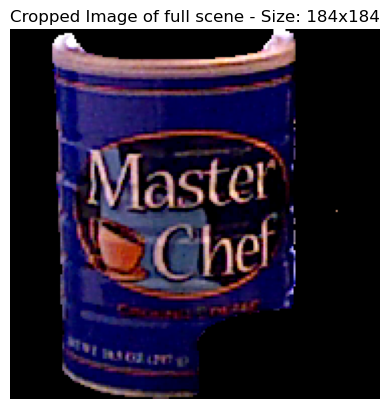

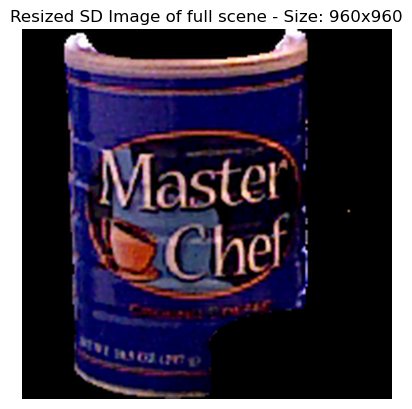

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


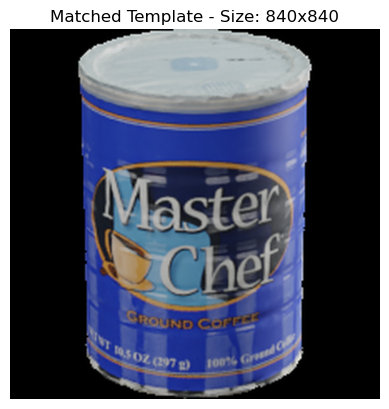

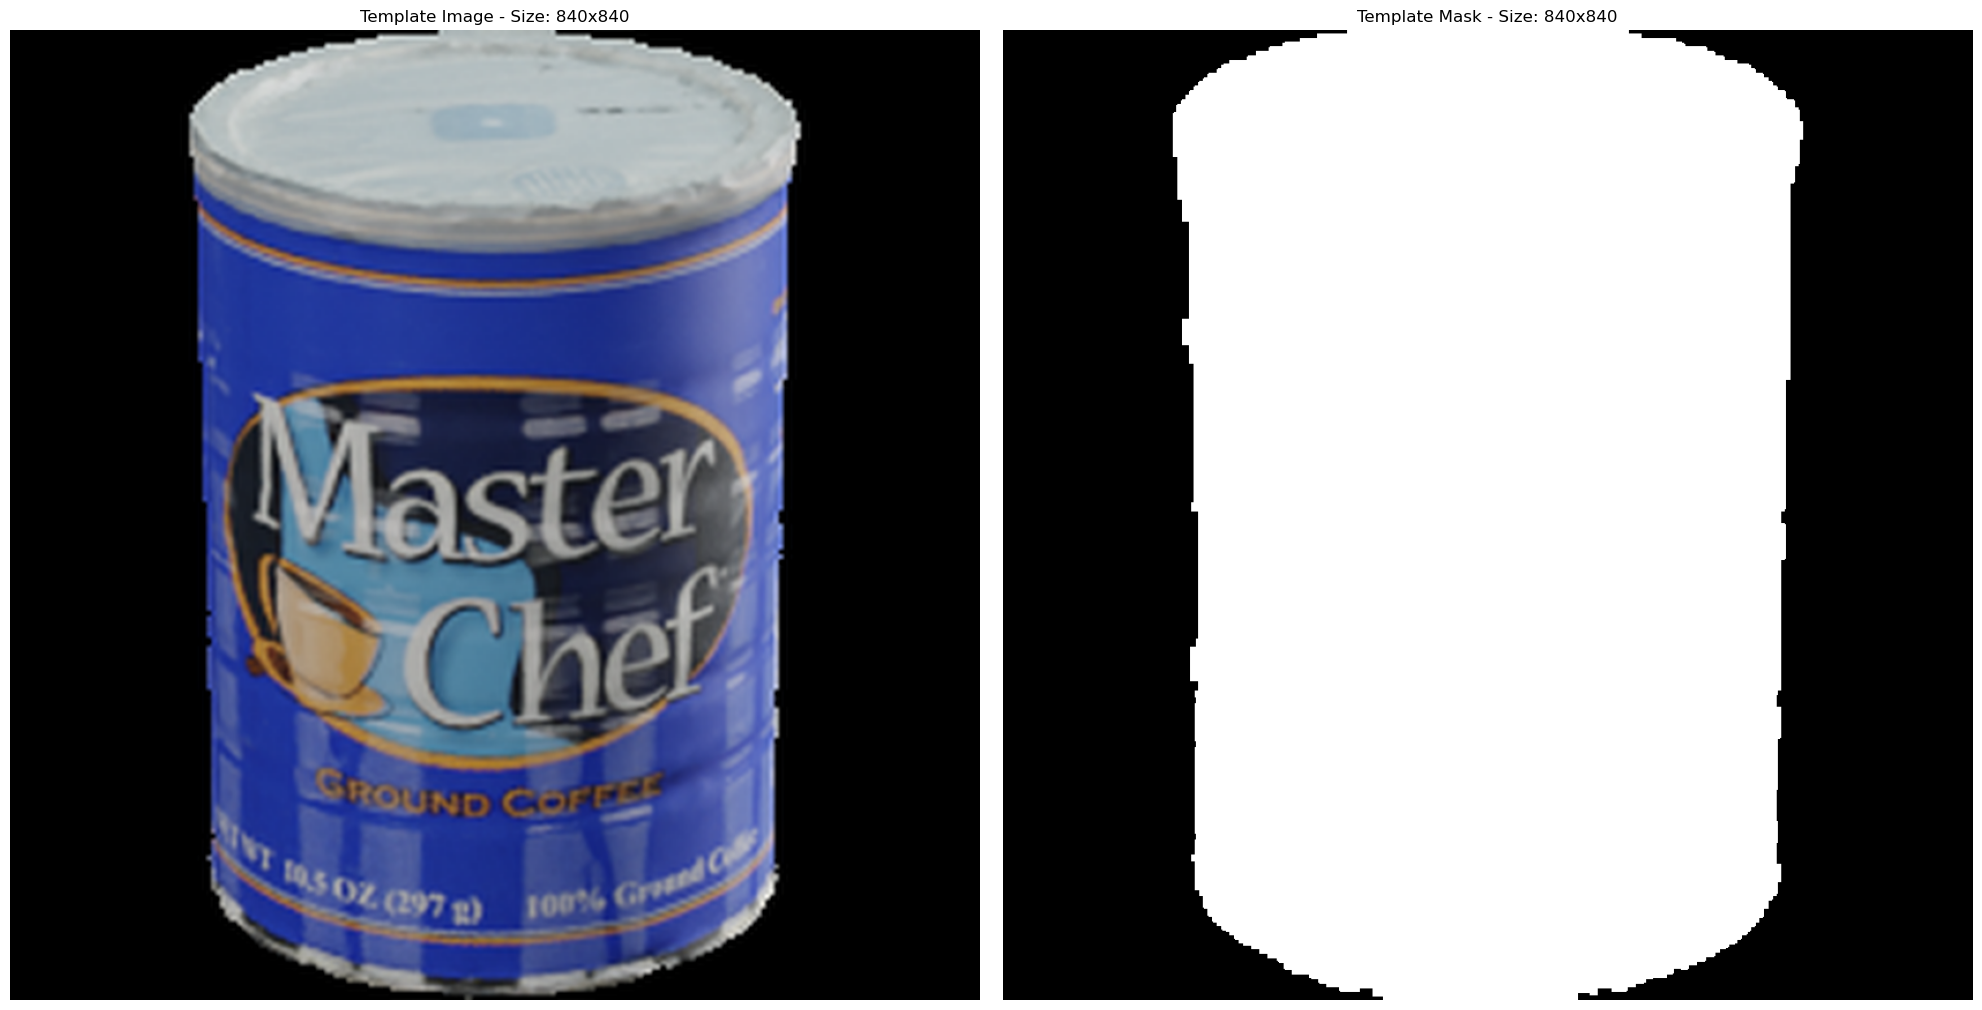

Shape of crop_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of template_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of crop_features_2d: torch.Size([3600, 1152])
Shape of template_features_2d: torch.Size([3600, 1152])
[(1, 1), (1, 4), (1, 7), (1, 10), (1, 13), (1, 16), (1, 19), (1, 23), (1, 26), (1, 29), (1, 32), (1, 35), (1, 38), (1, 41), (1, 44), (1, 47), (1, 50), (1, 53), (1, 56), (1, 59), (1, 62), (1, 65), (1, 69), (1, 72), (1, 75), (1, 78), (1, 81), (1, 84), (1, 87), (1, 90), (1, 93), (1, 96), (1, 99), (1, 102), (1, 105), (1, 108), (1, 111), (1, 115), (1, 118), (1, 121), (1, 124), (1, 127), (1, 130), (1, 133), (1, 136), (1, 139), (1, 142), (1, 145), (1, 148), (1, 151), (1, 154), (1, 157), (1, 161), (1, 164), (1, 167), (1, 170), (1, 173), (1, 176), (1, 179), (1, 182), (4, 1), (4, 4), (4, 7), (4, 10), (4, 13), (4, 16), (4, 19), (4, 23), (4, 26), (4, 29), (4, 32), (4, 35), (4, 38), (4, 41), (4, 44), (4, 47), (4, 50), (4, 53), (4, 56), (4, 59), (4, 62), (4, 65), (4, 69), (

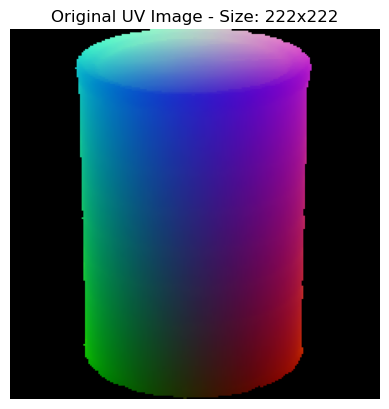

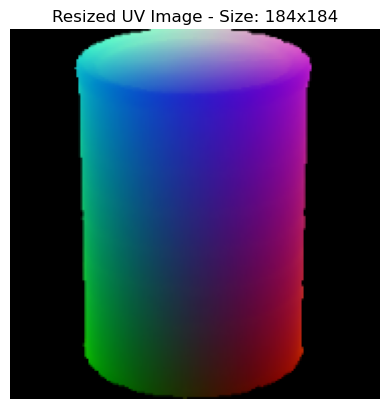

valid points 1:
[(1, 29), (1, 35), (1, 124), (1, 127), (1, 133), (4, 29), (4, 38), (4, 118), (4, 121), (4, 124), (4, 127), (4, 130), (4, 133), (4, 136), (4, 139), (7, 26), (7, 29), (7, 32), (7, 38), (7, 41), (7, 44), (7, 102), (7, 111), (7, 115), (7, 118), (7, 121), (7, 124), (7, 127), (7, 130), (7, 133), (7, 136), (7, 139), (10, 19), (10, 23), (10, 26), (10, 29), (10, 32), (10, 35), (10, 81), (10, 84), (10, 87), (10, 90), (10, 93), (10, 96), (10, 99), (10, 108), (10, 111), (10, 115), (10, 118), (10, 121), (10, 124), (10, 127), (10, 130), (10, 133), (10, 136), (10, 139), (10, 142), (13, 23), (13, 26), (13, 29), (13, 32), (13, 35), (13, 38), (13, 41), (13, 44), (13, 47), (13, 50), (13, 53), (13, 56), (13, 59), (13, 62), (13, 65), (13, 69), (13, 72), (13, 75), (13, 78), (13, 81), (13, 84), (13, 87), (13, 90), (13, 93), (13, 96), (13, 99), (13, 102), (13, 105), (13, 108), (13, 111), (13, 115), (13, 118), (13, 121), (13, 124), (13, 127), (13, 130), (13, 133), (13, 136), (13, 139), (13, 142

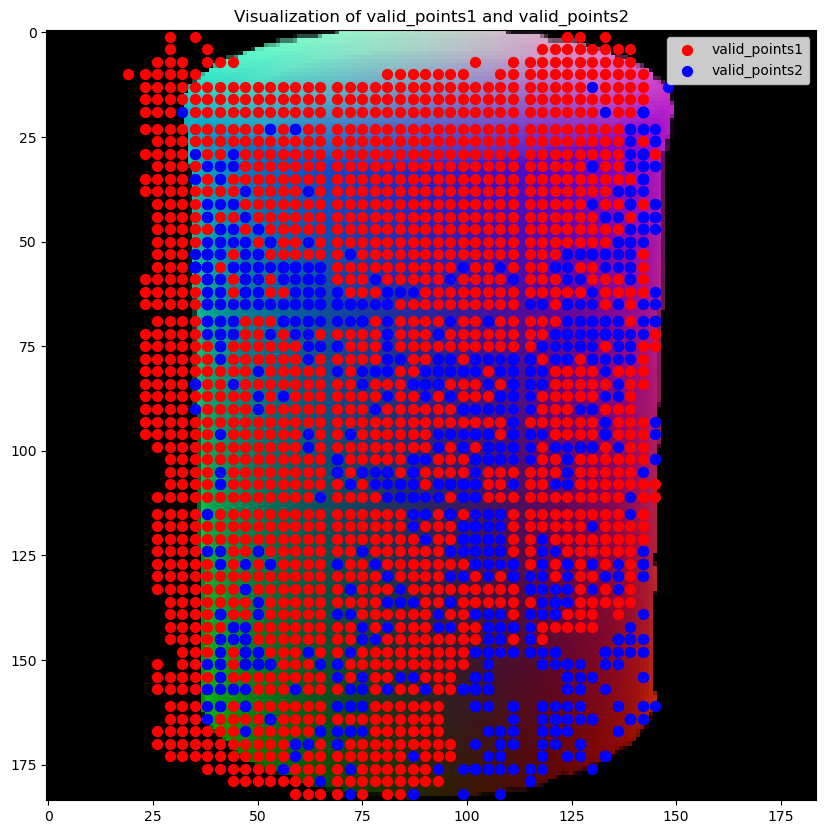

[[  1.  29.]
 [  1.  35.]
 [  1. 124.]
 ...
 [182.  81.]
 [182.  84.]
 [182.  87.]]


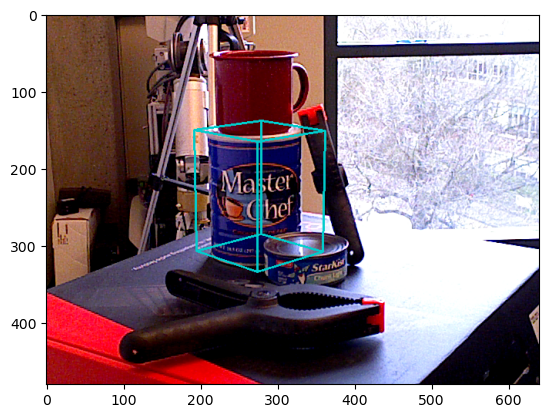

Pose estimation time: 16.61407470703125
R_est: [[ 0.71145312 -0.70268541 -0.00822669]
 [ 0.17238591  0.16316392  0.97142197]
 [-0.68126174 -0.69253935  0.23721654]]
t_est: [  30.99262604    9.00173365 -926.12854101]


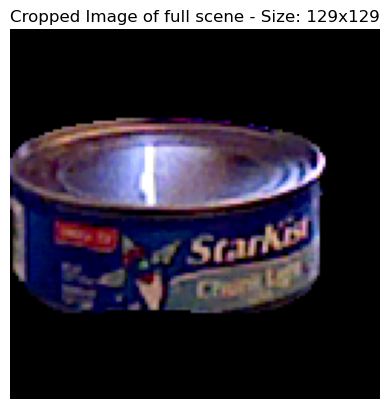

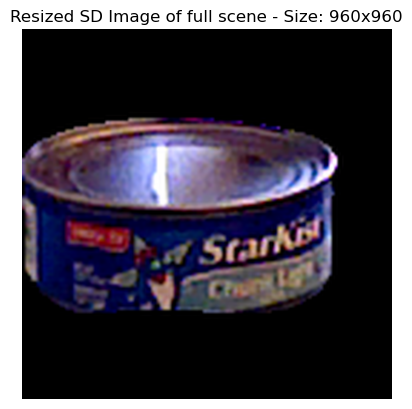

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


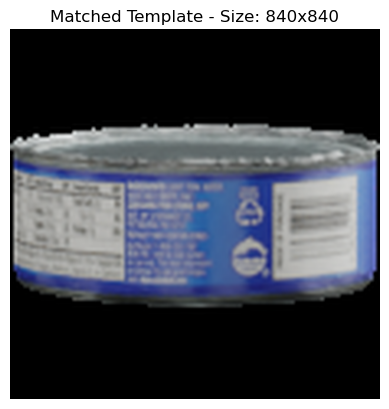

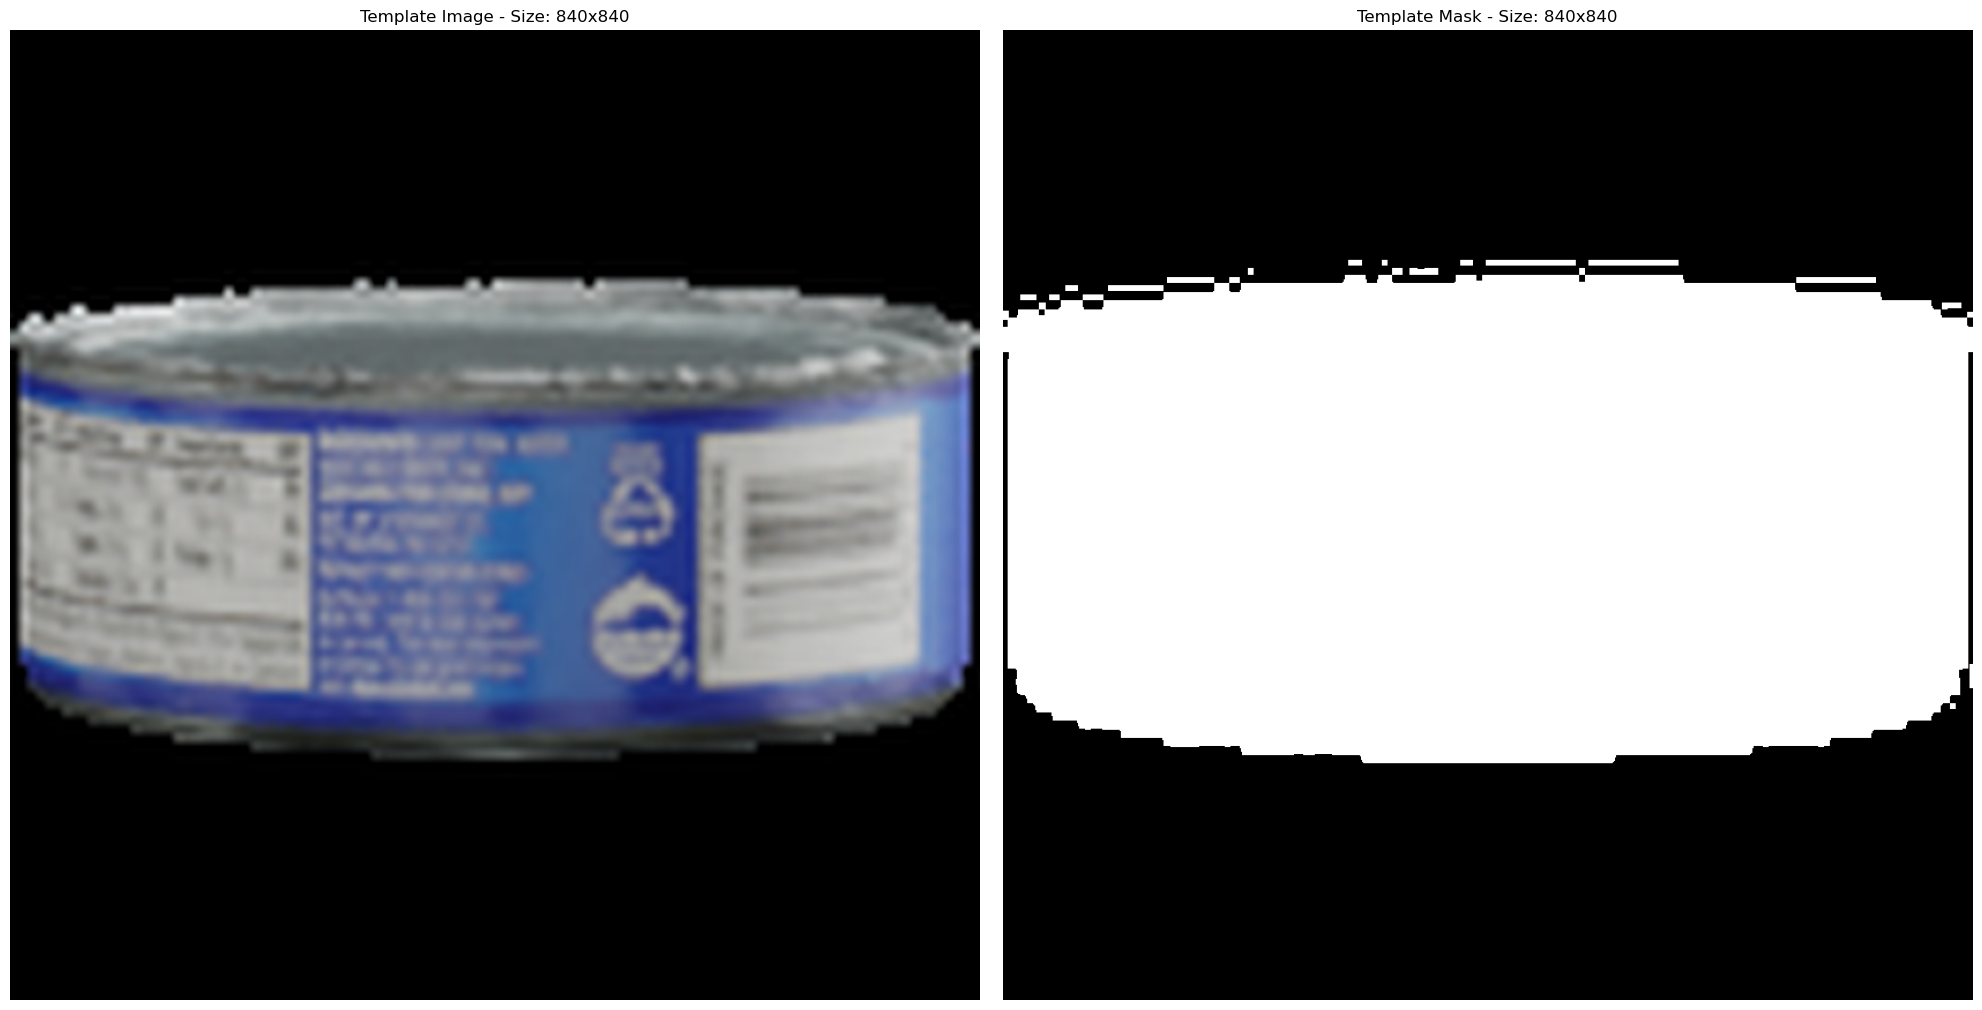

Shape of crop_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of template_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of crop_features_2d: torch.Size([3600, 1152])
Shape of template_features_2d: torch.Size([3600, 1152])
[(1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (1, 11), (1, 13), (1, 16), (1, 18), (1, 20), (1, 22), (1, 24), (1, 26), (1, 29), (1, 31), (1, 33), (1, 35), (1, 37), (1, 39), (1, 41), (1, 44), (1, 46), (1, 48), (1, 50), (1, 52), (1, 54), (1, 56), (1, 59), (1, 61), (1, 63), (1, 65), (1, 67), (1, 69), (1, 72), (1, 74), (1, 76), (1, 78), (1, 80), (1, 82), (1, 84), (1, 87), (1, 89), (1, 91), (1, 93), (1, 95), (1, 97), (1, 99), (1, 102), (1, 104), (1, 106), (1, 108), (1, 110), (1, 112), (1, 115), (1, 117), (1, 119), (1, 121), (1, 123), (1, 125), (1, 127), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (3, 11), (3, 13), (3, 16), (3, 18), (3, 20), (3, 22), (3, 24), (3, 26), (3, 29), (3, 31), (3, 33), (3, 35), (3, 37), (3, 39), (3, 41), (3, 44), (3, 46), (3, 48), (3, 50), (3, 52), (

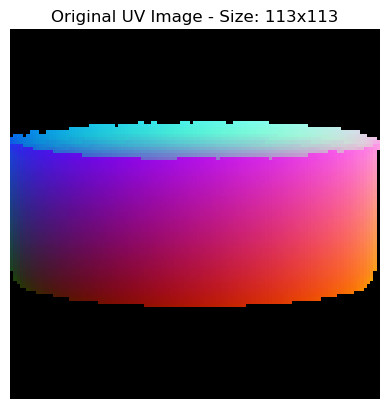

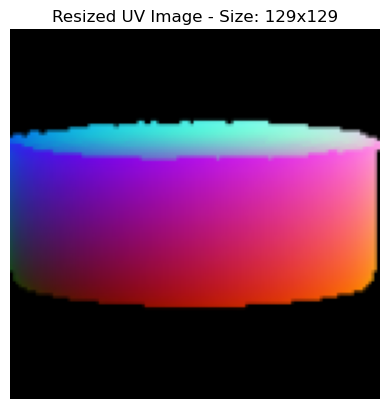

valid points 1:
[(26, 41), (26, 44), (26, 46), (26, 56), (26, 59), (26, 61), (29, 35), (29, 39), (29, 41), (29, 44), (29, 46), (29, 48), (29, 50), (29, 52), (29, 54), (29, 56), (29, 59), (29, 61), (29, 63), (29, 65), (31, 22), (31, 29), (31, 31), (31, 33), (31, 35), (31, 37), (31, 39), (31, 41), (31, 44), (31, 46), (31, 48), (31, 50), (31, 52), (31, 54), (31, 56), (31, 59), (31, 61), (31, 63), (31, 65), (31, 67), (31, 69), (31, 72), (31, 74), (31, 76), (31, 78), (31, 80), (33, 16), (33, 18), (33, 20), (33, 22), (33, 24), (33, 26), (33, 29), (33, 31), (33, 33), (33, 35), (33, 37), (33, 39), (33, 41), (33, 44), (33, 46), (33, 48), (33, 50), (33, 52), (33, 54), (33, 56), (33, 59), (33, 61), (33, 63), (33, 65), (33, 67), (33, 69), (33, 72), (33, 74), (33, 76), (33, 78), (33, 80), (33, 82), (33, 84), (33, 87), (33, 91), (33, 93), (33, 95), (35, 9), (35, 11), (35, 13), (35, 16), (35, 18), (35, 20), (35, 22), (35, 24), (35, 26), (35, 29), (35, 31), (35, 33), (35, 35), (35, 37), (35, 39), (35,

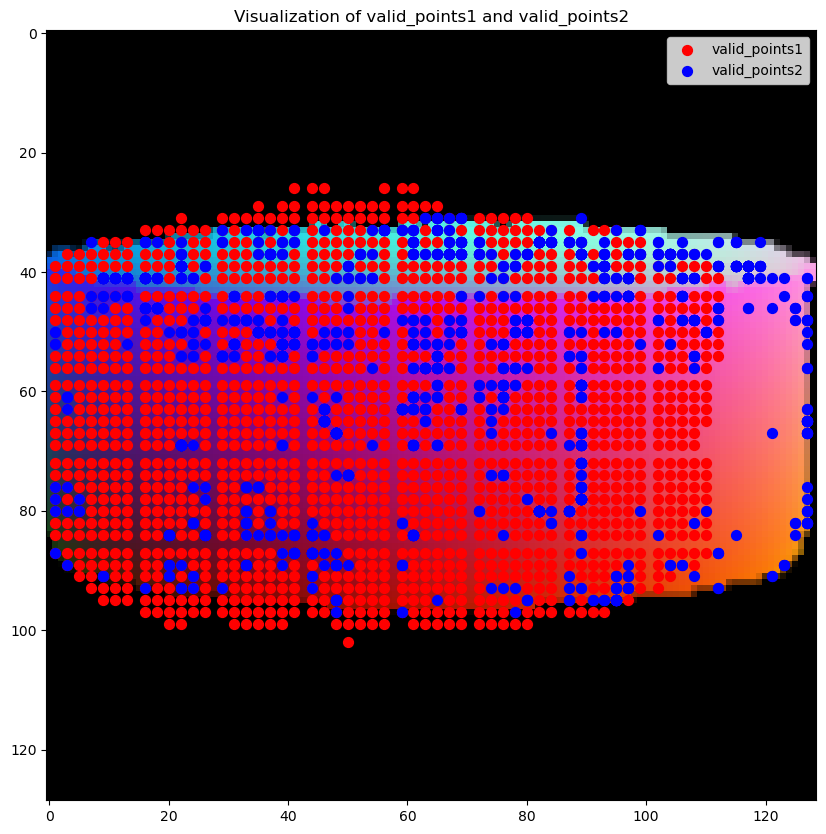

[[ 26.  41.]
 [ 26.  44.]
 [ 26.  46.]
 ...
 [ 99.  78.]
 [ 99.  80.]
 [102.  50.]]


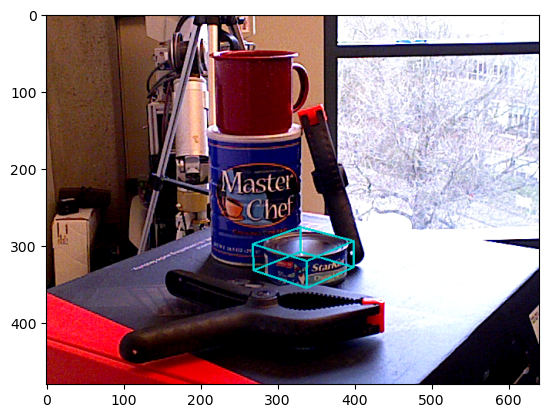

Pose estimation time: 5.975337266921997
R_est: [[ 0.73701903  0.67568599 -0.01585545]
 [ 0.18038226 -0.21925586 -0.9588478 ]
 [-0.65135643  0.70382903 -0.28347751]]
t_est: [ 19.75153346  67.26781701 989.00884662]


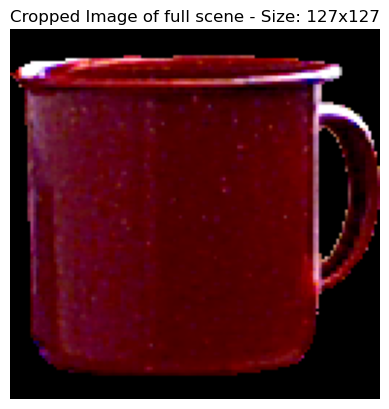

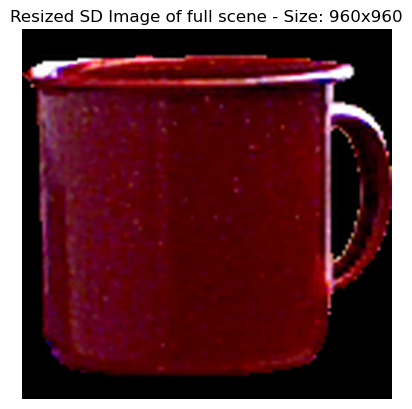

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


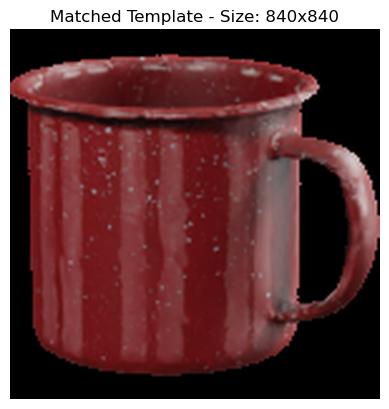

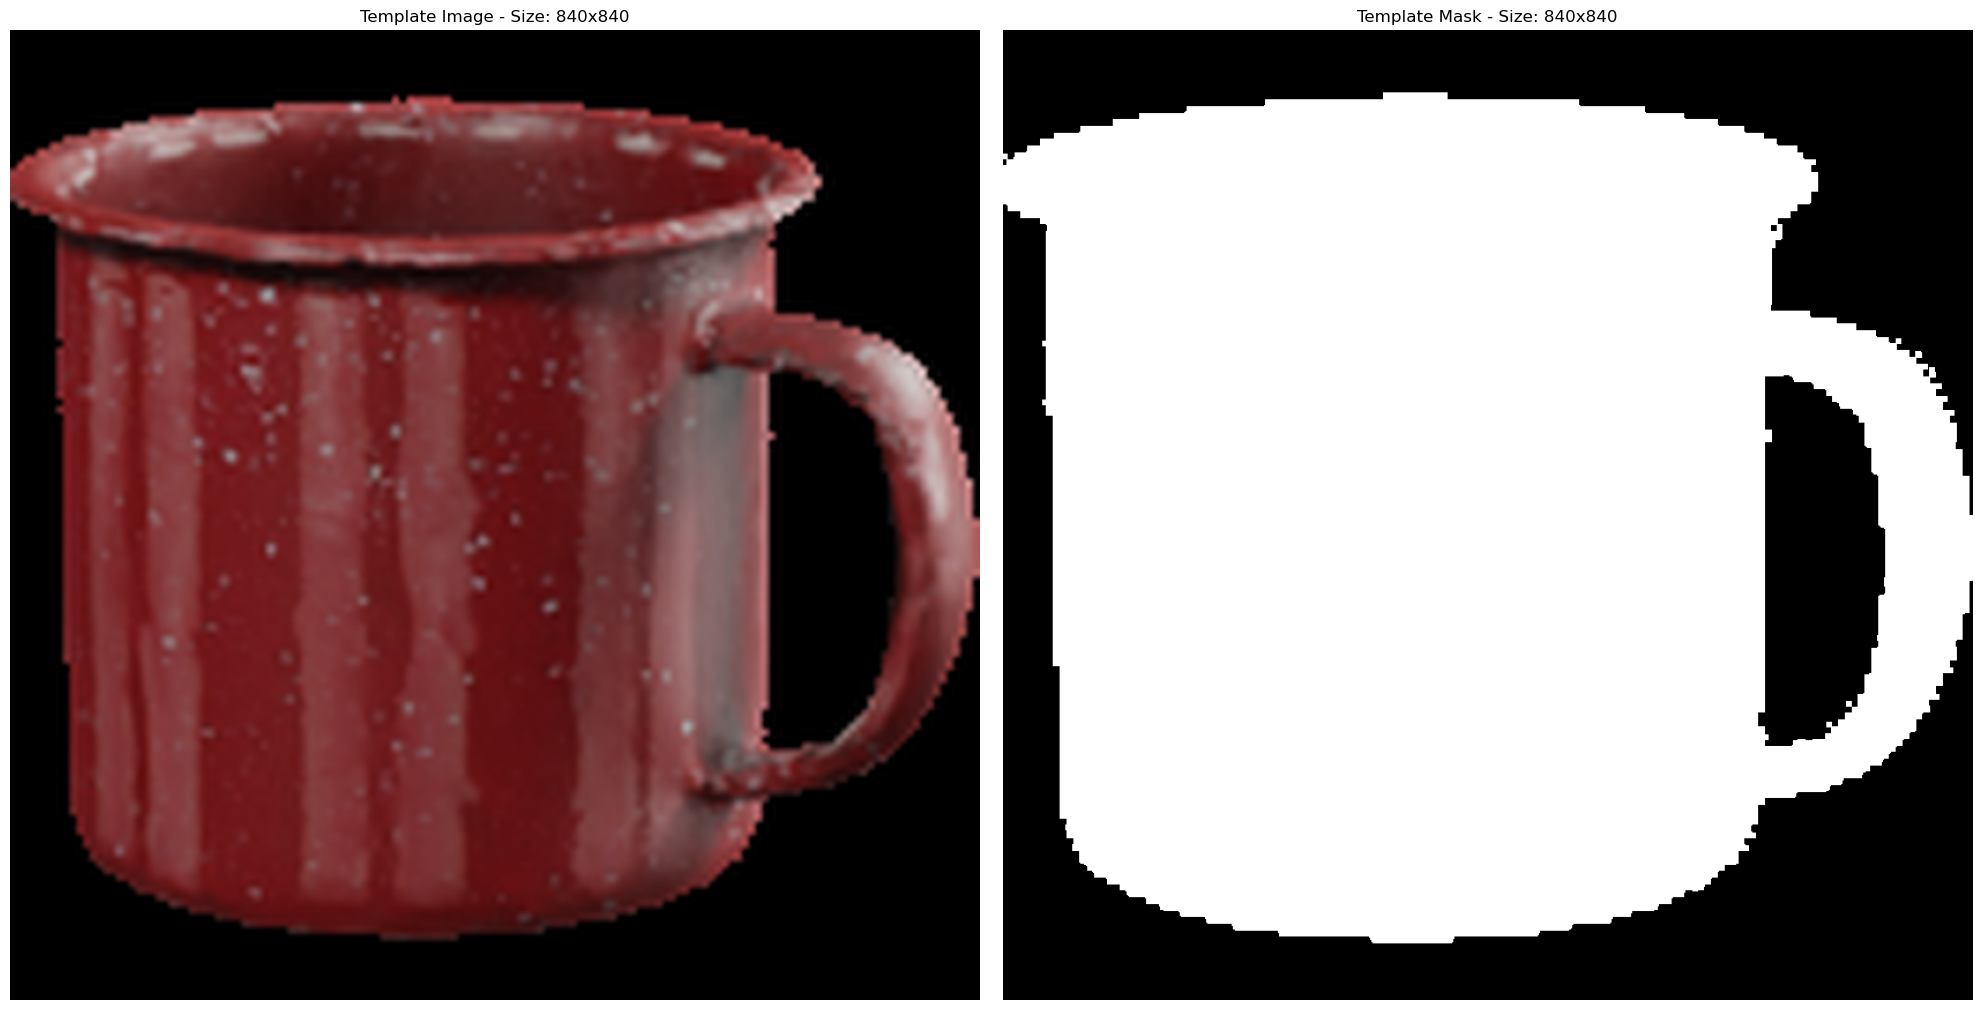

Shape of crop_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of template_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of crop_features_2d: torch.Size([3600, 1152])
Shape of template_features_2d: torch.Size([3600, 1152])
[(1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (1, 11), (1, 13), (1, 15), (1, 17), (1, 20), (1, 22), (1, 24), (1, 26), (1, 28), (1, 30), (1, 32), (1, 34), (1, 37), (1, 39), (1, 41), (1, 43), (1, 45), (1, 47), (1, 49), (1, 51), (1, 53), (1, 56), (1, 58), (1, 60), (1, 62), (1, 64), (1, 66), (1, 68), (1, 70), (1, 73), (1, 75), (1, 77), (1, 79), (1, 81), (1, 83), (1, 85), (1, 87), (1, 89), (1, 92), (1, 94), (1, 96), (1, 98), (1, 100), (1, 102), (1, 104), (1, 106), (1, 109), (1, 111), (1, 113), (1, 115), (1, 117), (1, 119), (1, 121), (1, 123), (1, 125), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (3, 11), (3, 13), (3, 15), (3, 17), (3, 20), (3, 22), (3, 24), (3, 26), (3, 28), (3, 30), (3, 32), (3, 34), (3, 37), (3, 39), (3, 41), (3, 43), (3, 45), (3, 47), (3, 49), (3, 51), (

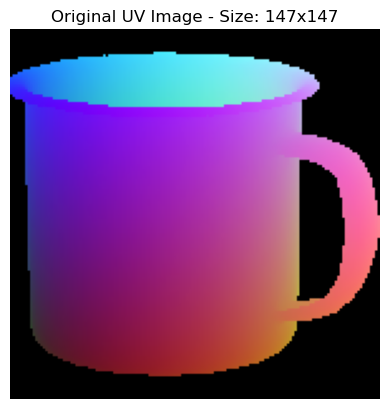

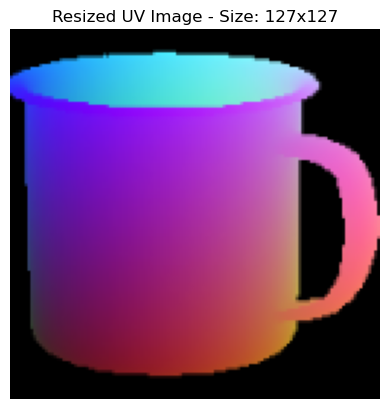

valid points 1:
[(9, 9), (9, 11), (9, 13), (9, 15), (9, 17), (9, 20), (9, 22), (9, 24), (9, 26), (9, 28), (9, 30), (9, 32), (9, 34), (9, 37), (9, 39), (9, 41), (9, 43), (9, 45), (9, 47), (9, 51), (9, 56), (9, 58), (9, 60), (9, 62), (9, 64), (9, 66), (9, 68), (9, 70), (9, 73), (9, 75), (9, 77), (9, 79), (9, 81), (9, 83), (9, 85), (9, 87), (9, 89), (9, 92), (9, 94), (9, 96), (9, 98), (9, 100), (9, 102), (11, 3), (11, 7), (11, 9), (11, 11), (11, 13), (11, 15), (11, 17), (11, 20), (11, 22), (11, 24), (11, 26), (11, 28), (11, 30), (11, 32), (11, 34), (11, 37), (11, 39), (11, 41), (11, 43), (11, 45), (11, 47), (11, 49), (11, 51), (11, 53), (11, 56), (11, 58), (11, 60), (11, 62), (11, 64), (11, 66), (11, 68), (11, 70), (11, 73), (11, 75), (11, 77), (11, 79), (11, 81), (11, 83), (11, 85), (11, 87), (11, 89), (11, 92), (11, 94), (11, 96), (11, 98), (11, 100), (11, 102), (11, 104), (11, 106), (11, 109), (11, 111), (11, 113), (13, 1), (13, 3), (13, 5), (13, 7), (13, 9), (13, 11), (13, 13), (13, 1

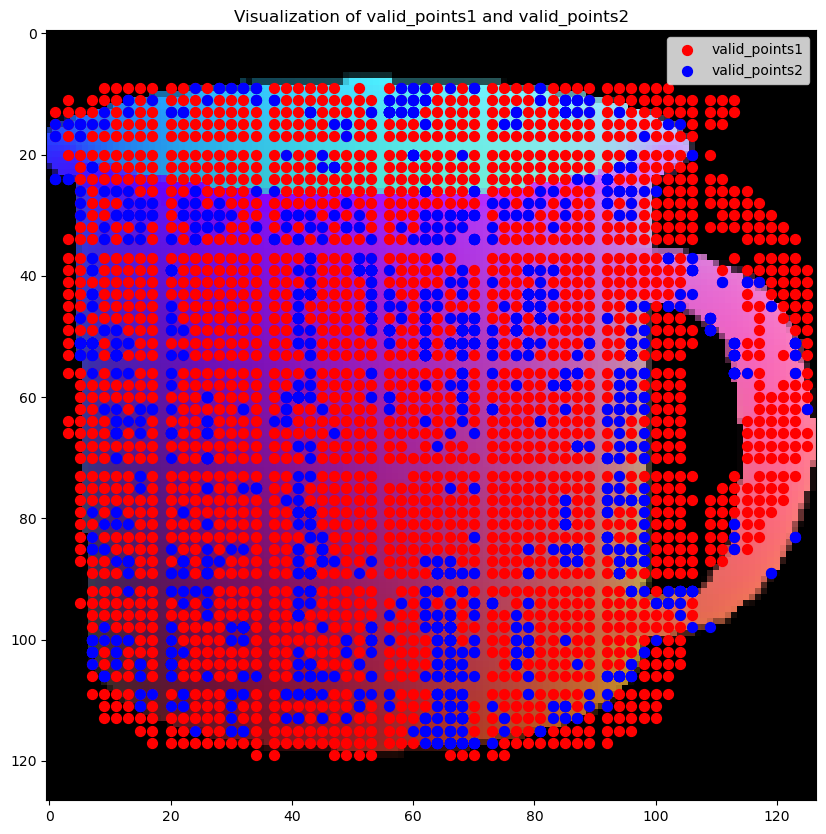

[[  9.   9.]
 [  9.  11.]
 [  9.  13.]
 ...
 [119.  70.]
 [119.  73.]
 [119.  75.]]


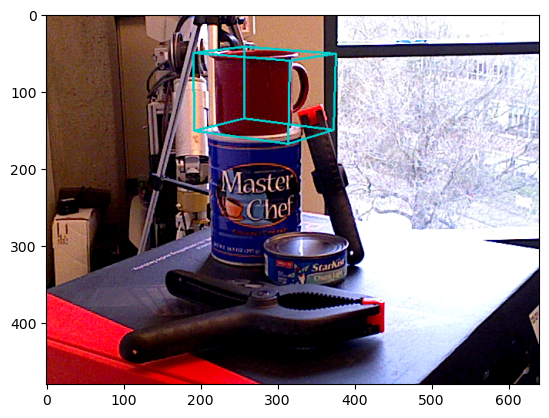

Pose estimation time: 6.176506519317627
R_est: [[ 0.85044395  0.5258169   0.01617621]
 [ 0.15534042 -0.22162814 -0.96267872]
 [-0.50260764  0.82121712 -0.27016293]]
t_est: [ -23.36288081 -113.68712848  867.54943096]


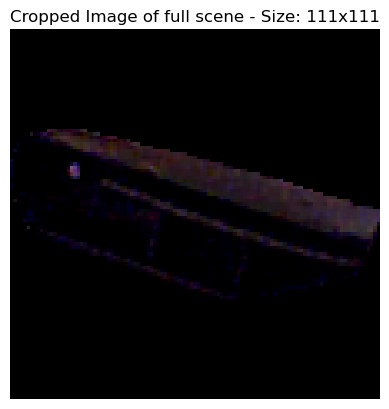

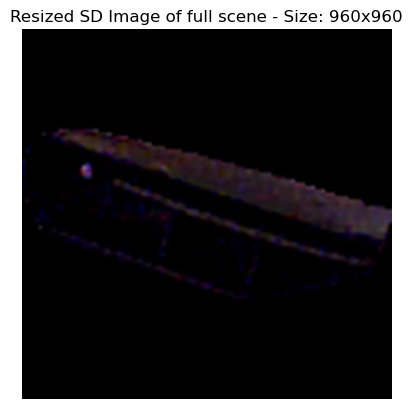

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


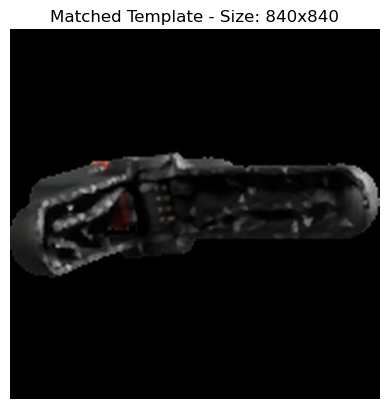

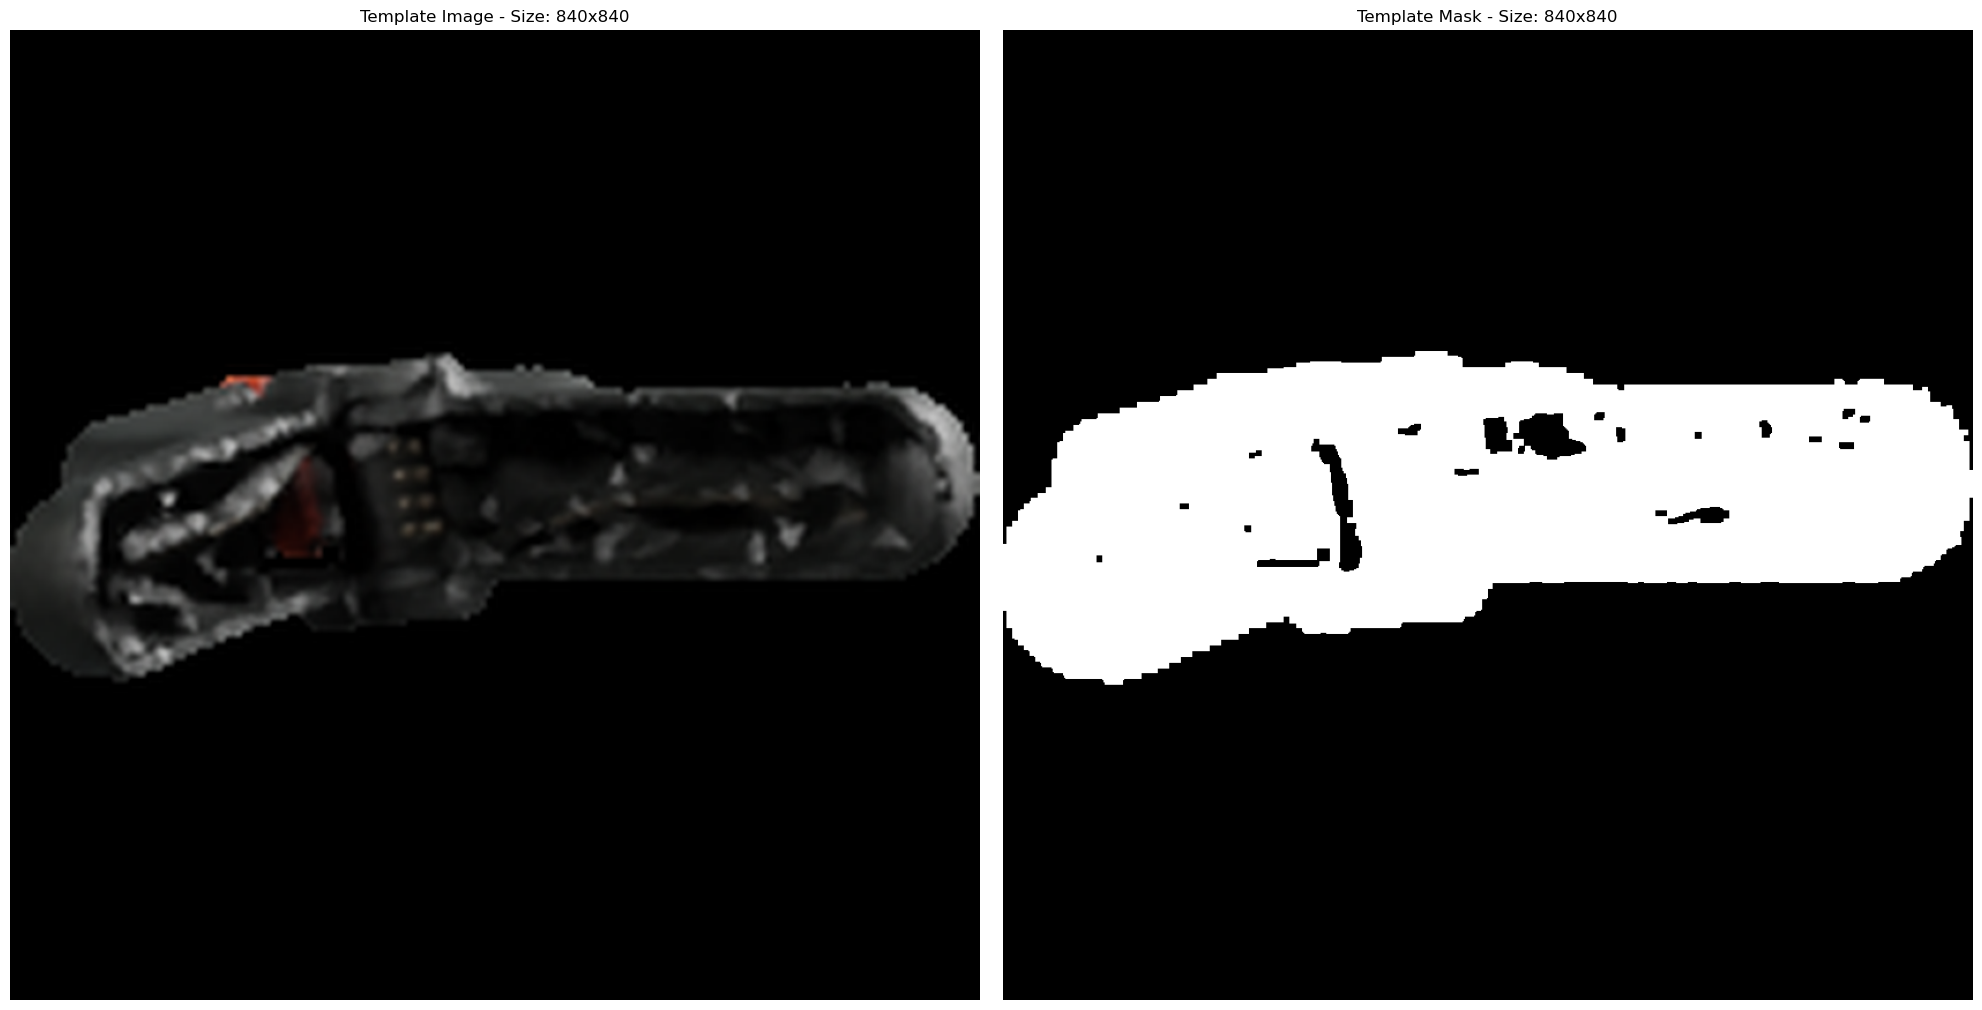

Shape of crop_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of template_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of crop_features_2d: torch.Size([3600, 1152])
Shape of template_features_2d: torch.Size([3600, 1152])
[(0, 0), (0, 2), (0, 4), (0, 6), (0, 8), (0, 10), (0, 12), (0, 13), (0, 15), (0, 17), (0, 19), (0, 21), (0, 23), (0, 24), (0, 26), (0, 28), (0, 30), (0, 32), (0, 34), (0, 36), (0, 37), (0, 39), (0, 41), (0, 43), (0, 45), (0, 47), (0, 49), (0, 50), (0, 52), (0, 54), (0, 56), (0, 58), (0, 60), (0, 61), (0, 63), (0, 65), (0, 67), (0, 69), (0, 71), (0, 73), (0, 74), (0, 76), (0, 78), (0, 80), (0, 82), (0, 84), (0, 86), (0, 87), (0, 89), (0, 91), (0, 93), (0, 95), (0, 97), (0, 98), (0, 100), (0, 102), (0, 104), (0, 106), (0, 108), (0, 110), (2, 0), (2, 2), (2, 4), (2, 6), (2, 8), (2, 10), (2, 12), (2, 13), (2, 15), (2, 17), (2, 19), (2, 21), (2, 23), (2, 24), (2, 26), (2, 28), (2, 30), (2, 32), (2, 34), (2, 36), (2, 37), (2, 39), (2, 41), (2, 43), (2, 45), (2, 47),

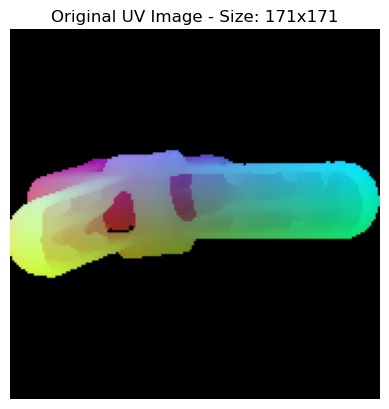

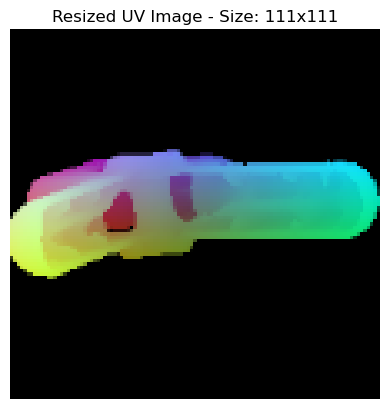

valid points 1:
[(28, 12), (28, 13), (28, 15), (28, 17), (28, 19), (30, 6), (30, 8), (30, 10), (30, 12), (30, 13), (30, 15), (30, 17), (30, 19), (30, 21), (30, 23), (30, 24), (30, 26), (30, 30), (32, 2), (32, 4), (32, 6), (32, 8), (32, 10), (32, 12), (32, 13), (32, 15), (32, 17), (32, 19), (32, 21), (32, 23), (32, 24), (32, 26), (32, 28), (32, 30), (32, 32), (32, 36), (34, 0), (34, 2), (34, 4), (34, 6), (34, 8), (34, 10), (34, 12), (34, 13), (34, 15), (34, 17), (34, 19), (34, 21), (34, 23), (34, 24), (34, 26), (34, 28), (34, 30), (34, 32), (34, 34), (34, 36), (34, 37), (34, 39), (34, 41), (36, 0), (36, 2), (36, 4), (36, 6), (36, 8), (36, 10), (36, 12), (36, 13), (36, 15), (36, 17), (36, 19), (36, 21), (36, 23), (36, 24), (36, 26), (36, 28), (36, 30), (36, 32), (36, 34), (36, 36), (36, 37), (36, 39), (36, 41), (36, 43), (36, 45), (36, 47), (37, 2), (37, 4), (37, 6), (37, 8), (37, 10), (37, 12), (37, 13), (37, 15), (37, 17), (37, 19), (37, 21), (37, 23), (37, 24), (37, 26), (37, 28), (37

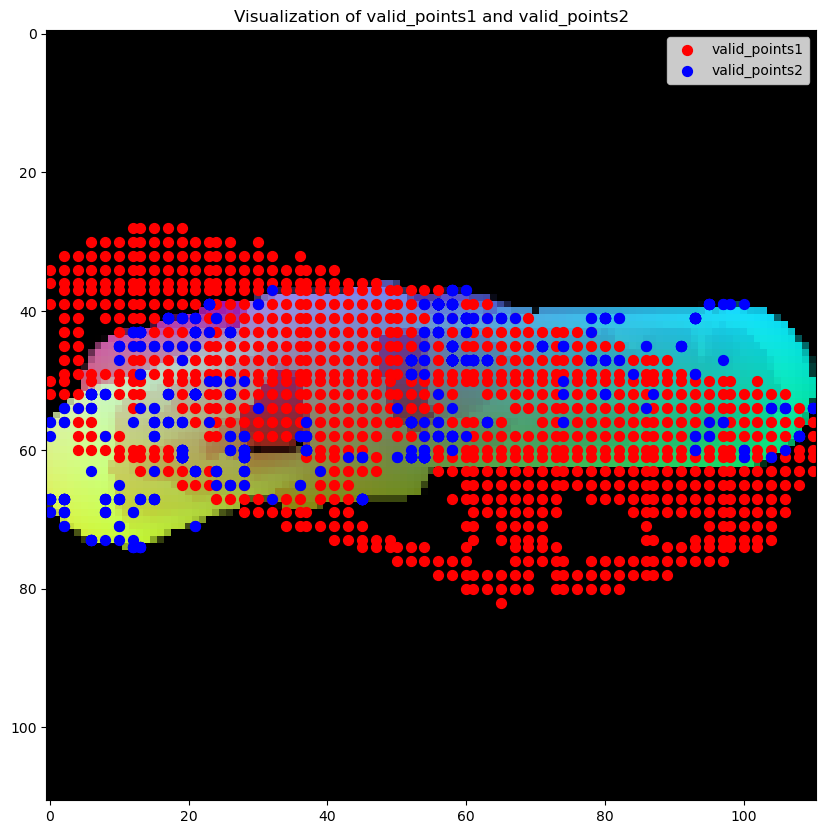

[[28. 12.]
 [28. 13.]
 [28. 15.]
 ...
 [80. 80.]
 [80. 82.]
 [82. 65.]]


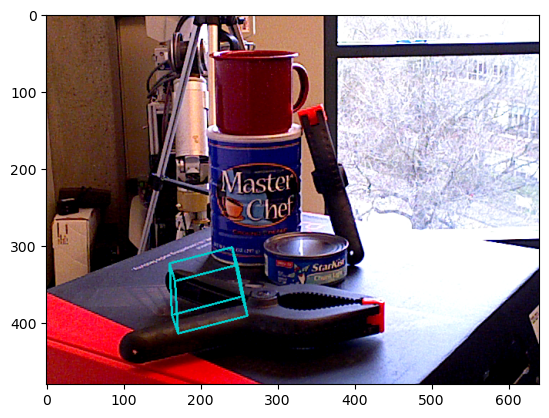

Pose estimation time: 5.7353832721710205
R_est: [[-0.96745411 -0.15141414  0.2027469 ]
 [ 0.24919445 -0.43080832  0.86735593]
 [-0.0439849   0.88965046  0.45451884]]
t_est: [-142.5389091   156.25402694 1454.56891707]


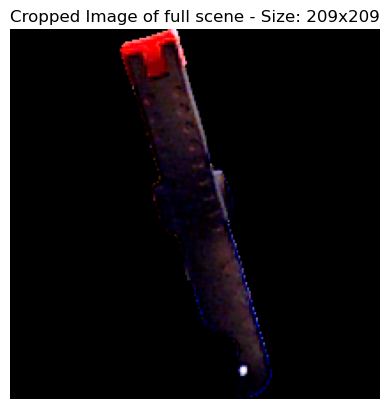

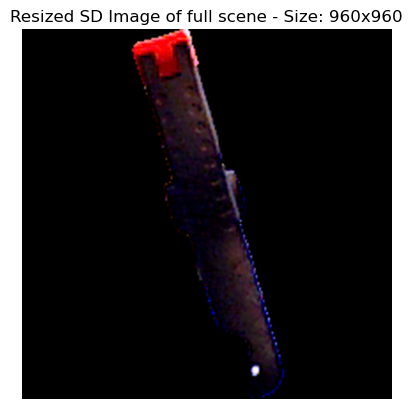

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


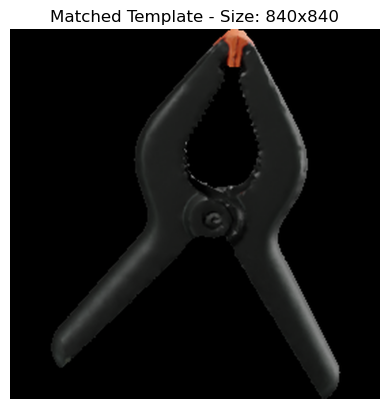

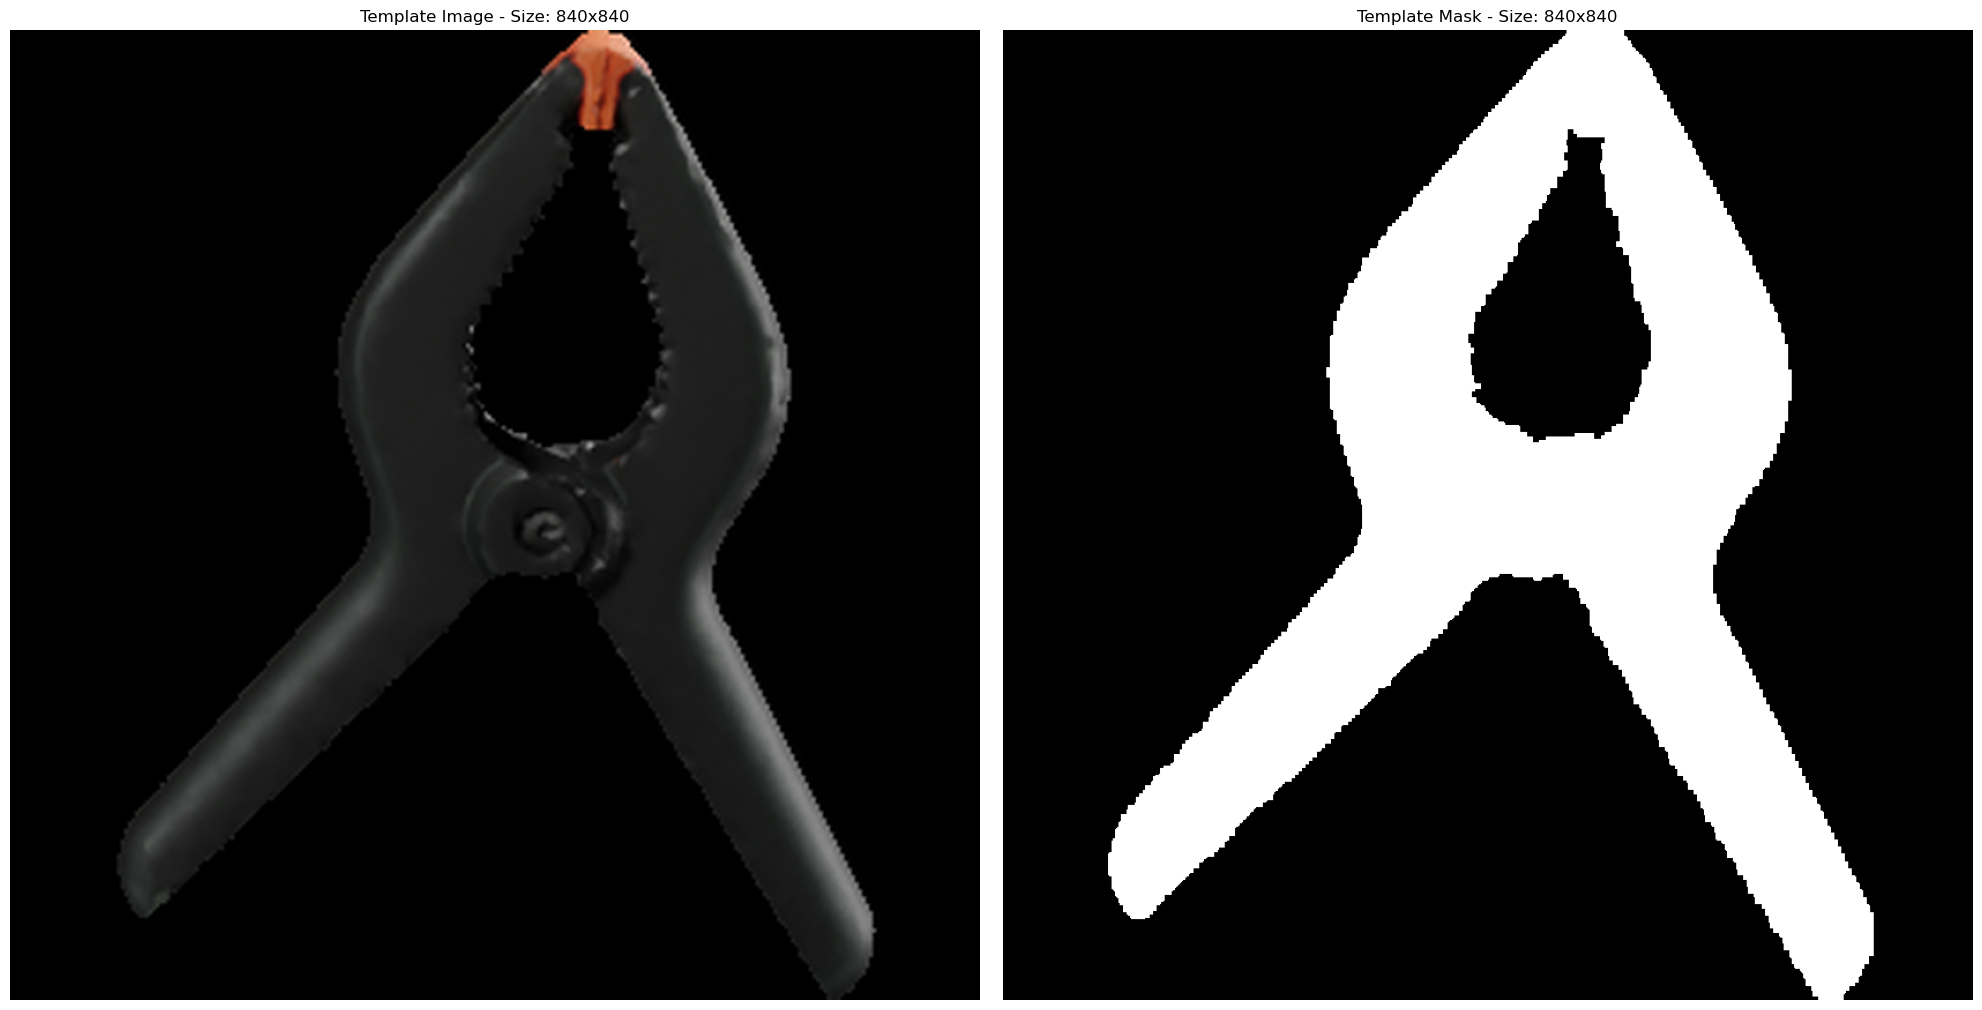

Shape of crop_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of template_desc_reshaped: torch.Size([1, 1152, 60, 60])
Shape of crop_features_2d: torch.Size([3600, 1152])
Shape of template_features_2d: torch.Size([3600, 1152])
[(1, 1), (1, 5), (1, 8), (1, 12), (1, 15), (1, 19), (1, 22), (1, 26), (1, 29), (1, 33), (1, 36), (1, 40), (1, 43), (1, 47), (1, 50), (1, 53), (1, 57), (1, 60), (1, 64), (1, 67), (1, 71), (1, 74), (1, 78), (1, 81), (1, 85), (1, 88), (1, 92), (1, 95), (1, 99), (1, 102), (1, 106), (1, 109), (1, 113), (1, 116), (1, 120), (1, 123), (1, 127), (1, 130), (1, 134), (1, 137), (1, 141), (1, 144), (1, 148), (1, 151), (1, 155), (1, 158), (1, 161), (1, 165), (1, 168), (1, 172), (1, 175), (1, 179), (1, 182), (1, 186), (1, 189), (1, 193), (1, 196), (1, 200), (1, 203), (1, 207), (5, 1), (5, 5), (5, 8), (5, 12), (5, 15), (5, 19), (5, 22), (5, 26), (5, 29), (5, 33), (5, 36), (5, 40), (5, 43), (5, 47), (5, 50), (5, 53), (5, 57), (5, 60), (5, 64), (5, 67), (5, 71), (5, 74), (5, 78

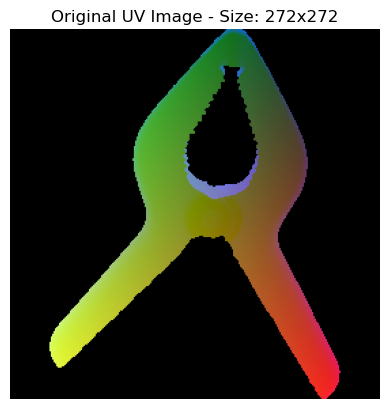

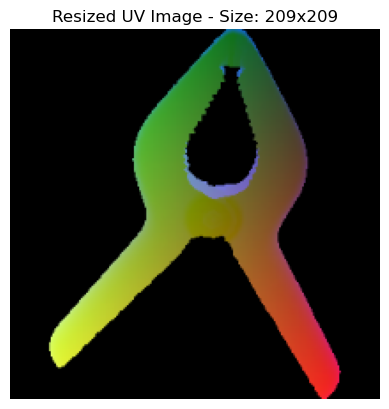

valid points 1:
[(1, 85), (1, 88), (1, 92), (1, 95), (5, 71), (5, 74), (5, 78), (5, 81), (5, 85), (5, 88), (5, 92), (5, 95), (8, 64), (8, 67), (8, 71), (8, 74), (8, 78), (8, 81), (8, 85), (8, 92), (8, 95), (12, 60), (12, 64), (12, 67), (12, 71), (12, 74), (12, 78), (12, 81), (12, 85), (12, 88), (12, 92), (12, 95), (12, 99), (15, 60), (15, 64), (15, 67), (15, 71), (15, 74), (15, 78), (15, 81), (15, 85), (15, 88), (15, 92), (15, 95), (15, 99), (19, 64), (19, 67), (19, 71), (19, 74), (19, 78), (19, 81), (19, 85), (19, 88), (19, 92), (19, 95), (19, 99), (22, 64), (22, 67), (22, 71), (22, 74), (22, 78), (22, 81), (22, 85), (22, 88), (22, 92), (22, 95), (22, 99), (26, 67), (26, 71), (26, 74), (26, 78), (26, 81), (26, 85), (26, 88), (26, 92), (26, 95), (26, 99), (29, 67), (29, 71), (29, 74), (29, 78), (29, 81), (29, 85), (29, 88), (29, 92), (29, 95), (29, 99), (33, 67), (33, 71), (33, 74), (33, 78), (33, 81), (33, 85), (33, 88), (33, 92), (33, 95), (33, 99), (33, 102), (36, 71), (36, 74), (36

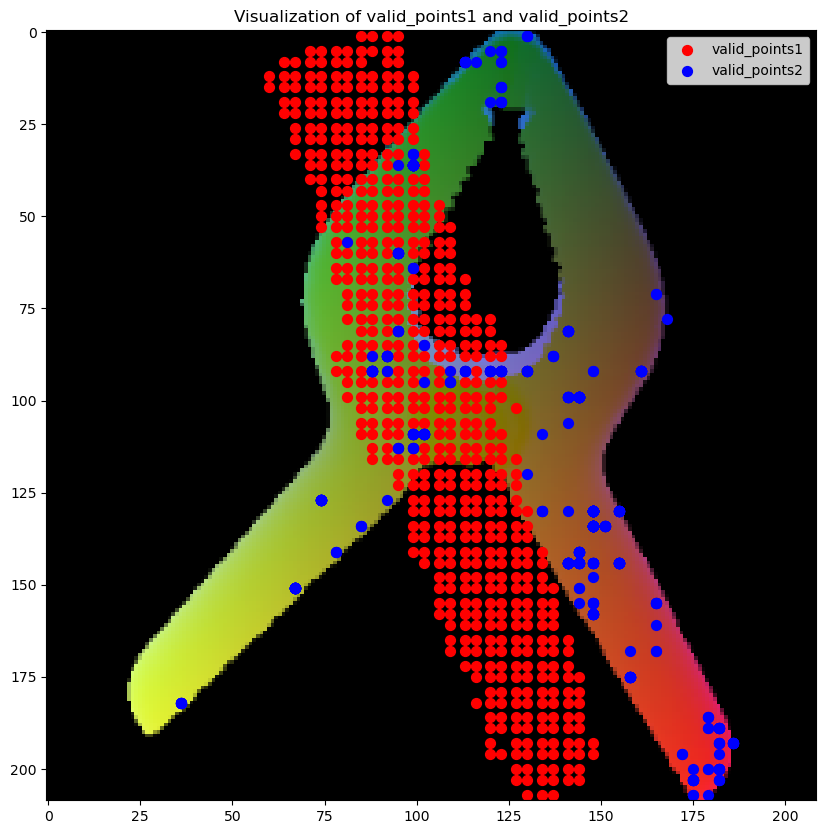

[[  1.  85.]
 [  1.  88.]
 [  1.  92.]
 ...
 [207. 130.]
 [207. 134.]
 [207. 137.]]


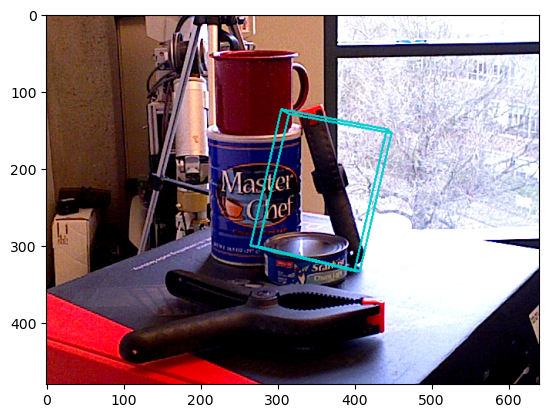

Pose estimation time: 5.902017593383789
R_est: [[-0.22409436 -0.92821421  0.29698502]
 [ 0.97444962 -0.20867133  0.08309165]
 [-0.01515459  0.30801731  0.95126005]]
t_est: [  49.83044785  -15.51688411 1225.87759548]


In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt
import torch


# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1' # for ycbv
#img_id = '36' # for lmo

device = 'cuda' if torch.cuda.is_available() else 'cpu'

patch_size = 14 #extractor.model.patch_embed.patch_size[0]
num_patches = int(patch_size / stride * (image_size_dino // patch_size))



for i in range(len(data_gt[img_id])): 
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = "./test/000002.png"
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator_sd_dino.get_pose(num_patches, img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")
